In [16]:
!ls /home/eurismar/notebooks/c-rnn-gan/datadir/classical/adam/

3000adamno_l.mid  3002robdia.mid  3003marquise.mid


In [28]:
from music21 import *
import glob
import numpy as np
from datetime import datetime
import os

In [48]:
path = '/home/eurismar/notebooks/c-rnn-gan/datadir/classical'

In [50]:
listdir = os.listdir(path)

In [51]:
files = []
for name in listdir:
    path_complete = os.path.join(path, name)
    files.extend(glob.glob('{}/*.mid*'.format(path_complete)))
    

In [52]:
len(files)

2831

In [53]:
files

['/home/eurismar/notebooks/c-rnn-gan/datadir/classical/mahler/1396mahler55.mid',
 '/home/eurismar/notebooks/c-rnn-gan/datadir/classical/mahler/1394mahl4mov1.mid',
 '/home/eurismar/notebooks/c-rnn-gan/datadir/classical/mahler/1397sym1mov1.mid',
 '/home/eurismar/notebooks/c-rnn-gan/datadir/classical/mahler/1395mahl4mov3.mid',
 '/home/eurismar/notebooks/c-rnn-gan/datadir/classical/mahler/559symphonyno5.mid',
 '/home/eurismar/notebooks/c-rnn-gan/datadir/classical/mahler/1398sym1mov2.mid',
 '/home/eurismar/notebooks/c-rnn-gan/datadir/classical/bach_teste/air.mid',
 '/home/eurismar/notebooks/c-rnn-gan/datadir/classical/bach_teste/2467lvbminuet.mid',
 '/home/eurismar/notebooks/c-rnn-gan/datadir/classical/meyerbeer/1250lafricSteven.mid',
 '/home/eurismar/notebooks/c-rnn-gan/datadir/classical/meyerbeer/1393gramarchSteven.mid',
 '/home/eurismar/notebooks/c-rnn-gan/datadir/classical/meyerbeer/1253afriparadis.mid',
 '/home/eurismar/notebooks/c-rnn-gan/datadir/classical/yradier/2148yrapalo.mid',
 '

In [89]:
#path = '/home/eurismar/notebooks/Music_Generator_Demo/Pop_Music_Midi/'
#path = '/home/eurismar/Downloads/midi/Harpa.Crista.em.Arquivo.MIDI'
#path = '/home/eurismar/notebooks/c-rnn-gan/datadir/classical/chopin'

In [90]:
file = files[0]

In [91]:
#file ='/home/eurismar/Downloads/midi/Harpa.Crista.em.Arquivo.MIDI/001.MID'

In [92]:
file

'/home/eurismar/Downloads/midi/sor/Sor_Op1_No1.mid'

In [93]:
midi_stream = converter.parse(file)

In [106]:
midi_stream.show('text')

{0.0} <music21.stream.Part 0x7f128bcf7940>
    {0.0} <music21.instrument.Guitar Guitar>
    {0.0} <music21.instrument.Guitar Guitar>
    {0.0} <music21.tempo.MetronomeMark maestoso Quarter=90.0>
    {0.0} <music21.meter.TimeSignature 3/4>
    {0.0} <music21.stream.Voice 0x7f128d287f60>
        {0.0} <music21.note.Note B>
        {1.0} <music21.note.Note B>
        {2.0} <music21.note.Note C>
        {3.0} <music21.note.Note D>
        {4.75} <music21.note.Note E>
        {5.0} <music21.note.Note D>
        {6.0} <music21.chord.Chord E4 C4>
        {7.0} <music21.chord.Chord F#4 D4>
        {8.0} <music21.chord.Chord G4 E4>
        {9.0} <music21.chord.Chord F#4 D4>
        {10.0} <music21.note.Note F#>
        {10.0} <music21.chord.Chord E4 C4>
        {10.75} <music21.note.Note D>
        {11.0} <music21.chord.Chord D4 B3>
        {12.0} <music21.chord.Chord G4 B3>
        {13.0} <music21.chord.Chord B4 B3>
        {14.0} <music21.chord.Chord D5 B3>
        {15.0} <music21.note.Note F

In [107]:
teste = midi_stream.chordify()

In [108]:
teste.show('text')

{0.0} <music21.instrument.Guitar Guitar>
{0.0} <music21.instrument.Guitar Guitar>
{0.0} <music21.instrument.Guitar Guitar>
{0.0} <music21.instrument.Guitar Guitar>
{0.0} <music21.instrument.Guitar Guitar>
{0.0} <music21.instrument.Guitar Guitar>
{0.0} <music21.tempo.MetronomeMark maestoso Quarter=90.0>
{0.0} <music21.meter.TimeSignature 3/4>
{0.0} <music21.meter.TimeSignature 3/4>
{0.0} <music21.meter.TimeSignature 3/4>
{0.0} <music21.chord.Chord B3 G3 G2>
{0.5} <music21.chord.Chord B3 D3 G2>
{1.0} <music21.chord.Chord B3 G3 G2>
{1.5} <music21.chord.Chord B3 D3 G2>
{2.0} <music21.chord.Chord C4 A3 G2>
{2.5} <music21.chord.Chord C4 D3 G2>
{3.0} <music21.chord.Chord D4 B3 G2>
{3.5} <music21.chord.Chord D4 G3 G2>
{4.0} <music21.chord.Chord D4 B3 G2>
{4.5} <music21.chord.Chord D4 G3 G2>
{4.75} <music21.chord.Chord E4 C4 G2>
{5.0} <music21.chord.Chord D4 B3 G2>
{5.5} <music21.chord.Chord D4 G3 G2>
{6.0} <music21.chord.Chord E4 C4 G3>
{6.5} <music21.chord.Chord E4 C4 G3>
{7.0} <music21.chord

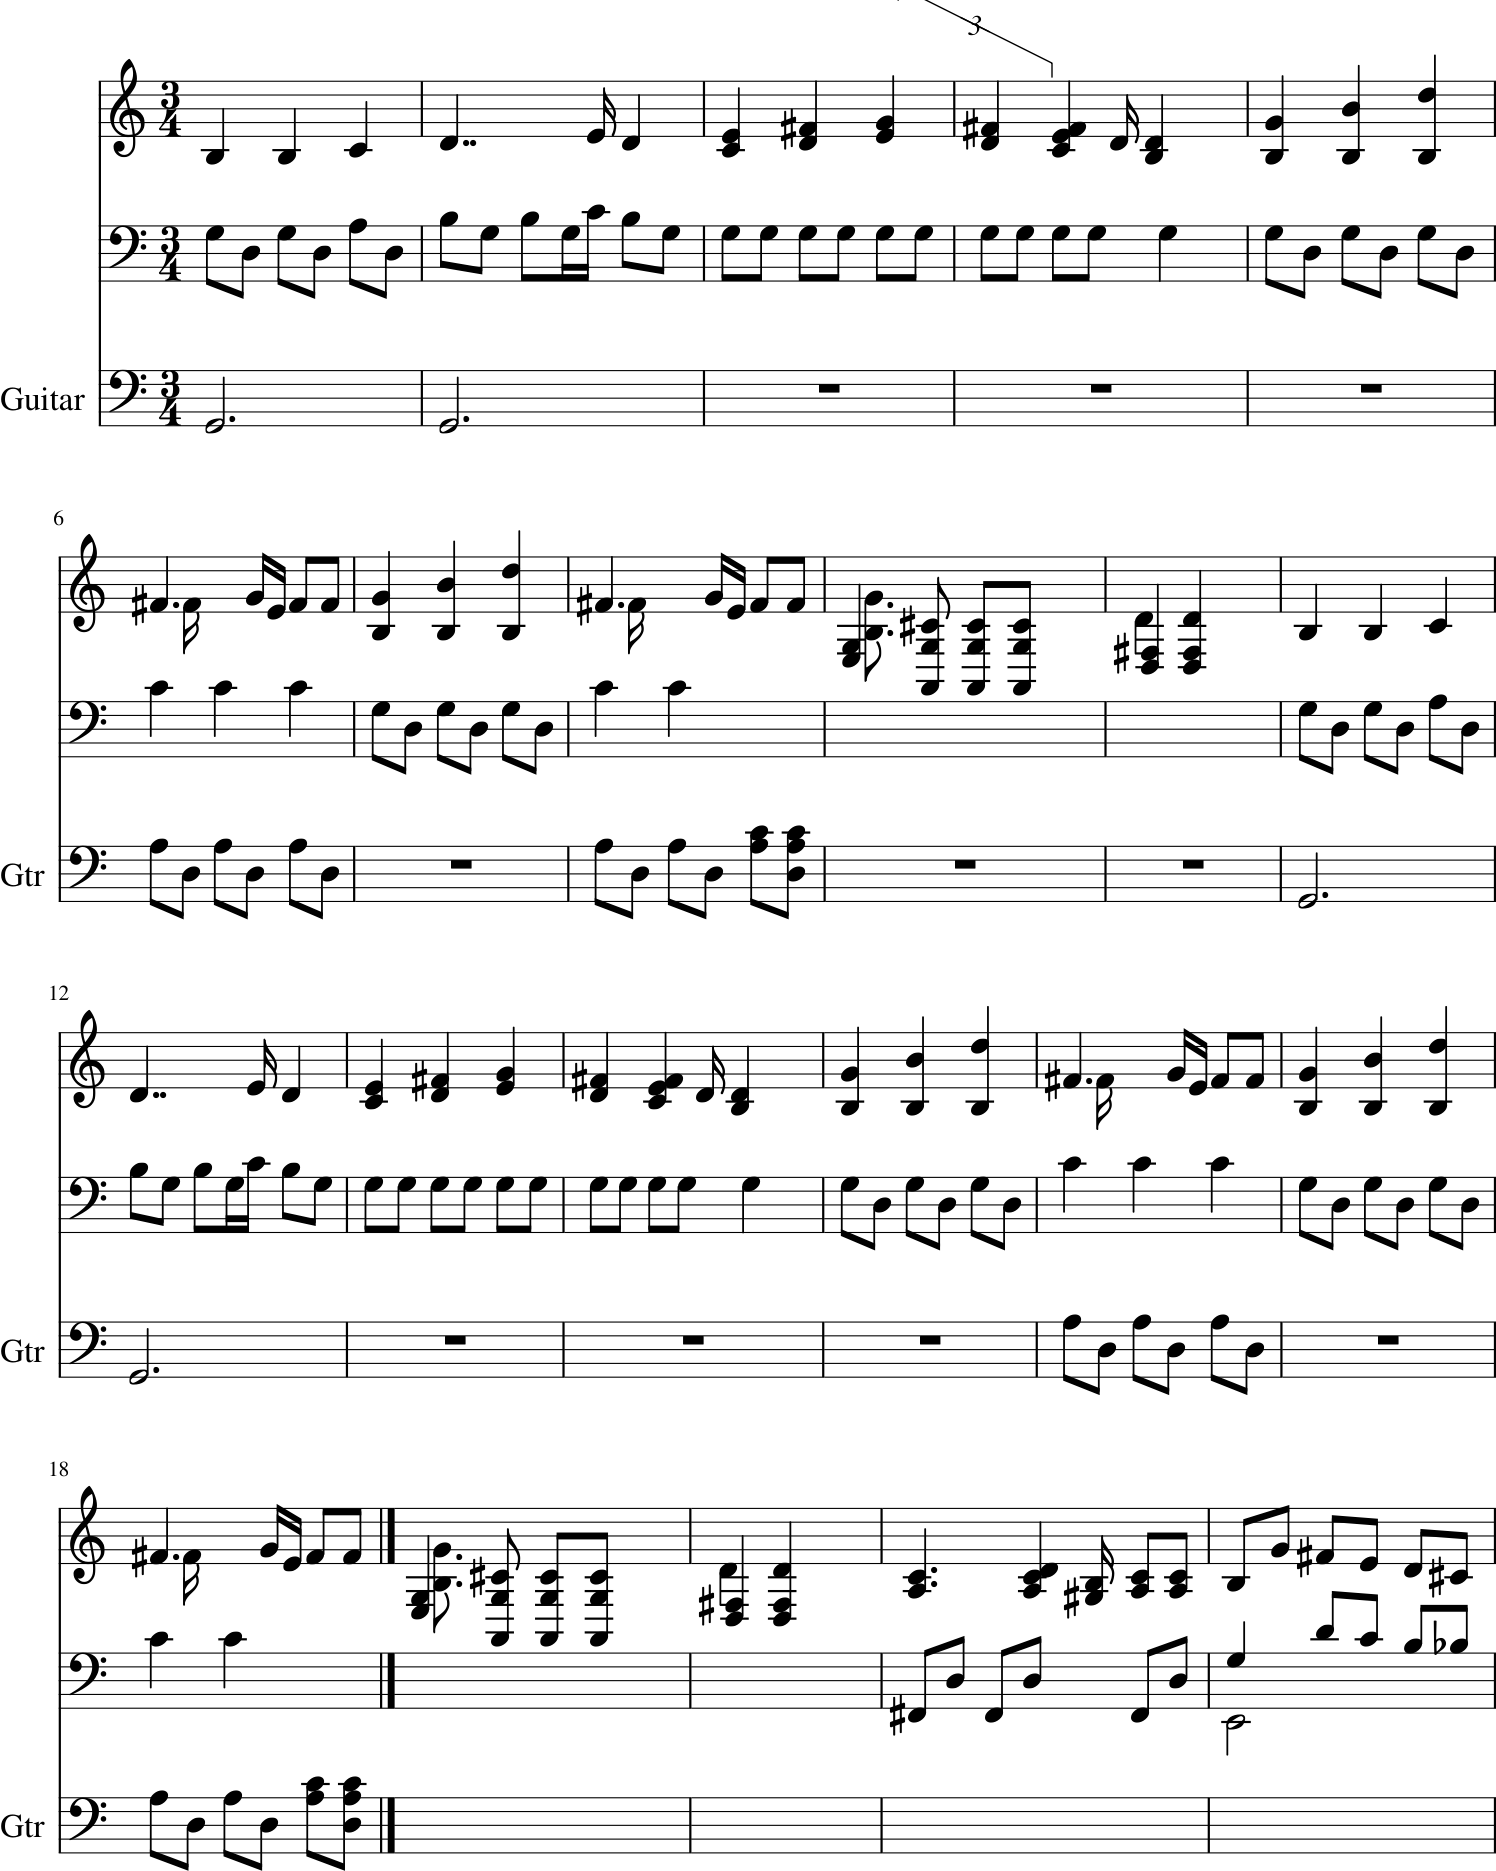

In [109]:
midi_stream.show()

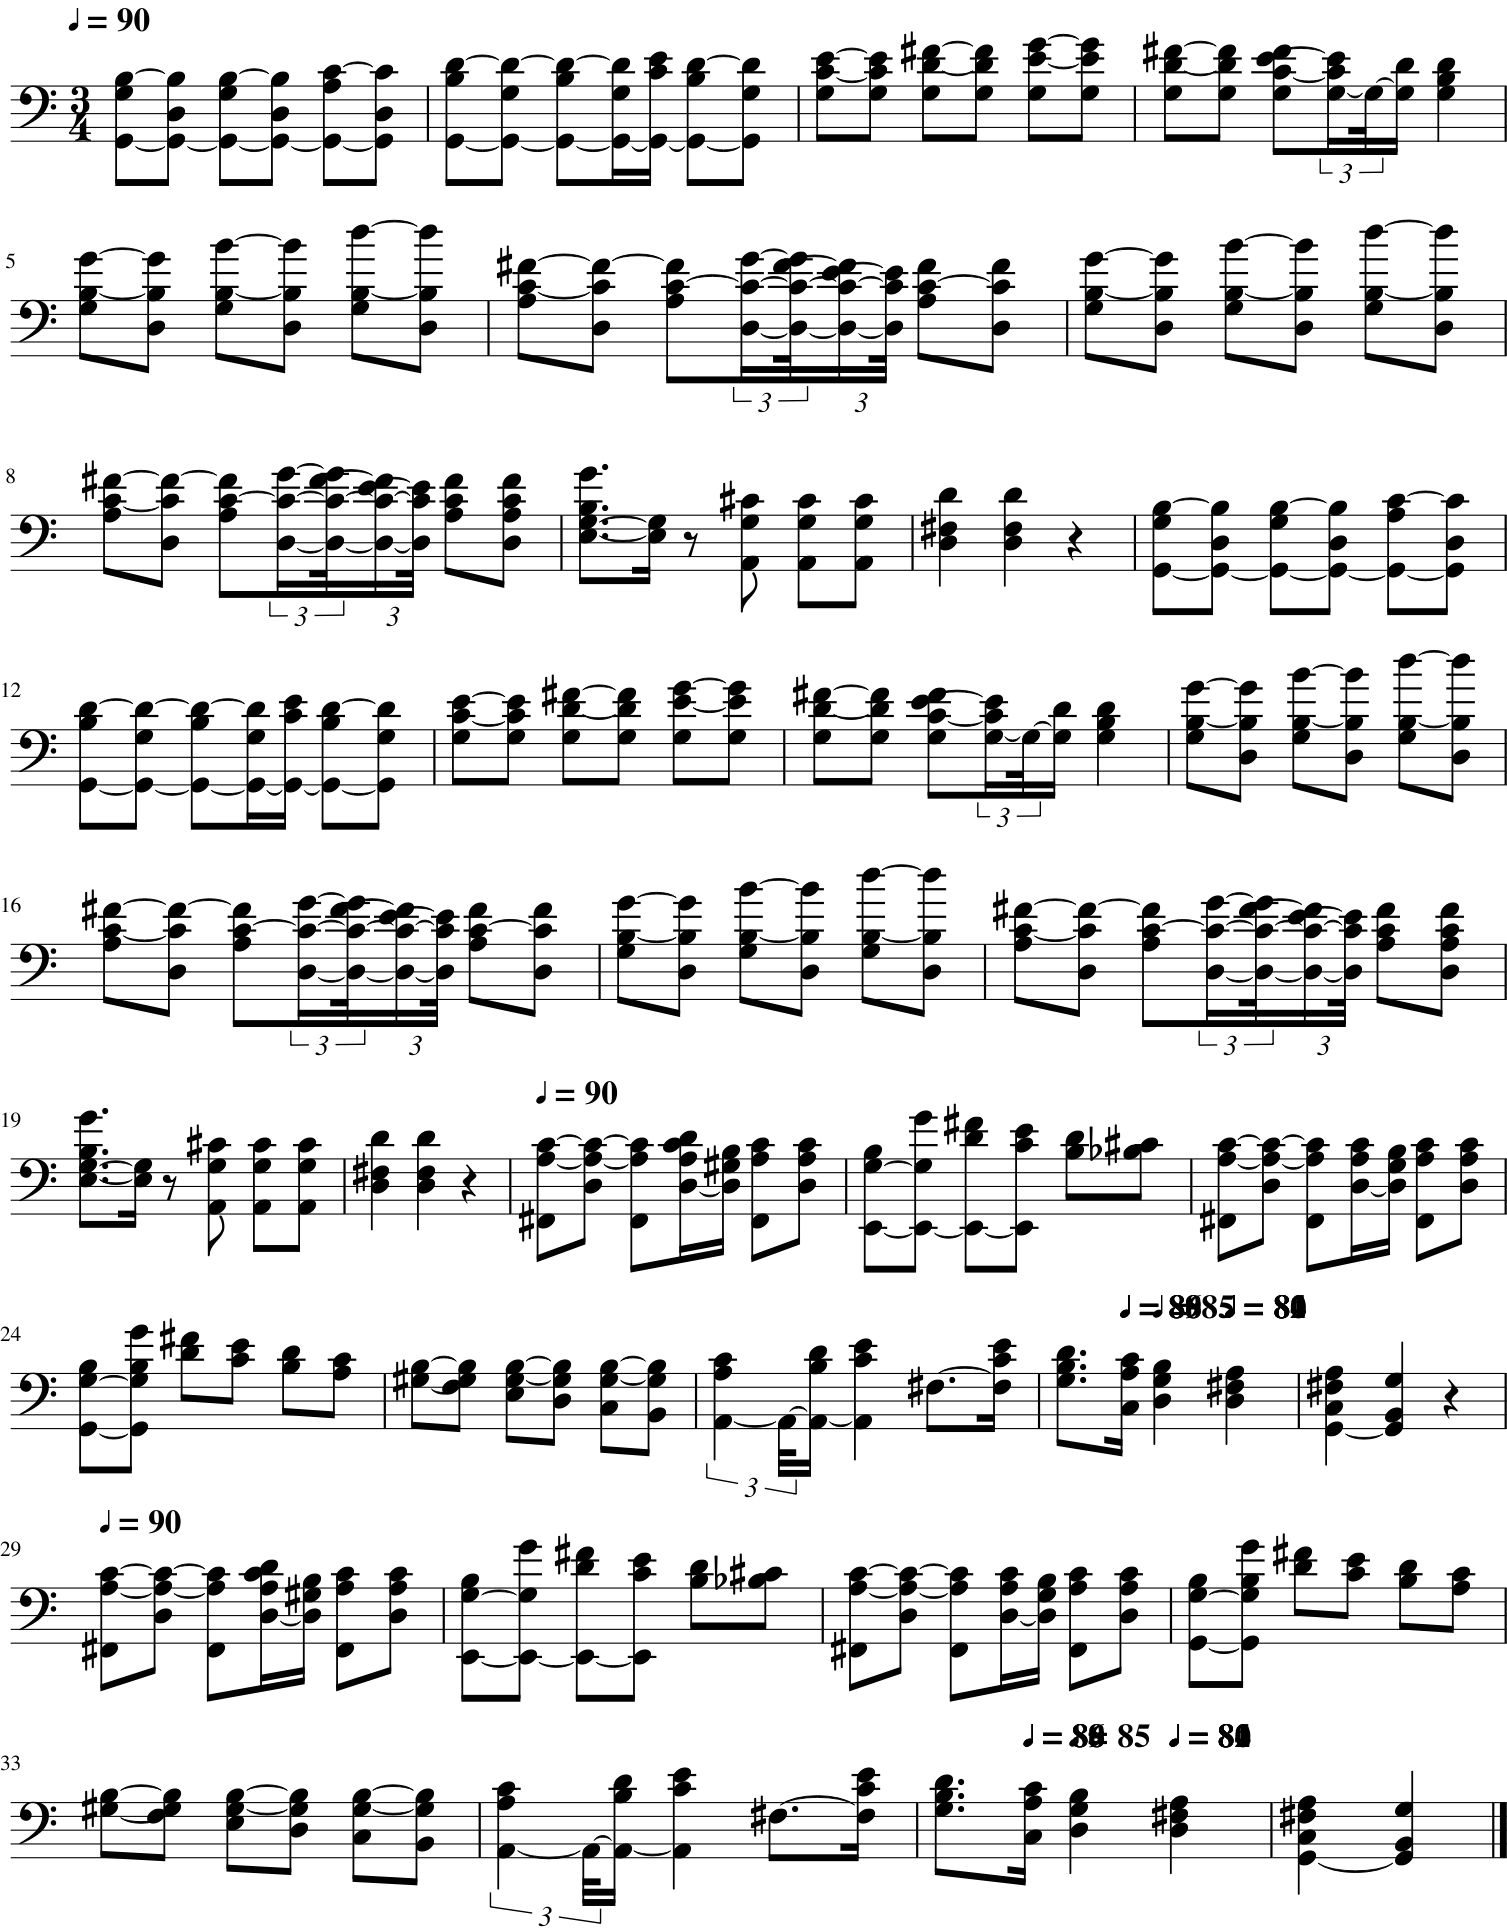

In [110]:
teste.show()

In [111]:
teste.show('text')

{0.0} <music21.instrument.Guitar Guitar>
{0.0} <music21.instrument.Guitar Guitar>
{0.0} <music21.instrument.Guitar Guitar>
{0.0} <music21.instrument.Guitar Guitar>
{0.0} <music21.instrument.Guitar Guitar>
{0.0} <music21.instrument.Guitar Guitar>
{0.0} <music21.tempo.MetronomeMark maestoso Quarter=90.0>
{0.0} <music21.meter.TimeSignature 3/4>
{0.0} <music21.meter.TimeSignature 3/4>
{0.0} <music21.meter.TimeSignature 3/4>
{0.0} <music21.chord.Chord B3 G3 G2>
{0.5} <music21.chord.Chord B3 D3 G2>
{1.0} <music21.chord.Chord B3 G3 G2>
{1.5} <music21.chord.Chord B3 D3 G2>
{2.0} <music21.chord.Chord C4 A3 G2>
{2.5} <music21.chord.Chord C4 D3 G2>
{3.0} <music21.chord.Chord D4 B3 G2>
{3.5} <music21.chord.Chord D4 G3 G2>
{4.0} <music21.chord.Chord D4 B3 G2>
{4.5} <music21.chord.Chord D4 G3 G2>
{4.75} <music21.chord.Chord E4 C4 G2>
{5.0} <music21.chord.Chord D4 B3 G2>
{5.5} <music21.chord.Chord D4 G3 G2>
{6.0} <music21.chord.Chord E4 C4 G3>
{6.5} <music21.chord.Chord E4 C4 G3>
{7.0} <music21.chord

In [95]:
part0 = midi_stream[0]

In [96]:
key_sig = part0.keySignature

In [97]:
print(key_sig)

None


In [98]:
KEY_SIG_OFFSET = 0

In [99]:
if key_sig != None:
    midi_stream.transpose(KEY_SIG_OFFSET - key_sig.tonic.pitchClass, inPlace=True)

In [100]:
melody_corpus = []
for m in part0.measures(1, None):
    m.show('text')
    if hasattr(m, 'flat'):
        for nr in m.flat.notesAndRests:
            pitch = nr.pitch.midi  if isinstance(nr, note.Note) else 0
            duration = float(nr.quarterLength)
            note_repr = (pitch, duration)
            melody_corpus.append(note_repr)

<music21.instrument.Guitar Guitar>
{0.0} <music21.clef.TrebleClef>
{0.0} <music21.meter.TimeSignature 3/4>
{0.0} <music21.stream.Voice 0>
    {0.0} <music21.note.Note B>
    {1.0} <music21.note.Note B>
    {2.0} <music21.note.Note C>
{0.0} <music21.stream.Voice 1>

{0.0} <music21.stream.Voice 0>
    {0.0} <music21.note.Note D>
    {1.75} <music21.note.Note E>
    {2.0} <music21.note.Note D>
{0.0} <music21.stream.Voice 1>

{0.0} <music21.stream.Voice 0>
    {0.0} <music21.chord.Chord E4 C4>
    {1.0} <music21.chord.Chord F#4 D4>
    {2.0} <music21.chord.Chord G4 E4>
{0.0} <music21.stream.Voice 1>

{0.0} <music21.stream.Voice 0>
    {0.0} <music21.chord.Chord F#4 D4>
    {1.0} <music21.note.Note F#>
    {1.0} <music21.chord.Chord E4 C4>
    {1.75} <music21.note.Note D>
    {2.0} <music21.chord.Chord D4 B3>
{0.0} <music21.stream.Voice 1>

{0.0} <music21.stream.Voice 0>
    {0.0} <music21.chord.Chord G4 B3>
    {1.0} <music21.chord.Chord B4 B3>
    {2.0} <music21.chord.Chord D5 B3>
{0.0} <

In [101]:
melody_corpus

[(59, 1.0),
 (59, 1.0),
 (60, 1.0),
 (62, 1.75),
 (64, 0.25),
 (62, 1.0),
 (0, 1.0),
 (0, 1.0),
 (0, 1.0),
 (0, 1.0),
 (66, 0.0),
 (0, 0.6666666666666666),
 (62, 0.25),
 (0, 1.0),
 (0, 1.0),
 (0, 1.0),
 (0, 1.0),
 (66, 1.5),
 (67, 0.25),
 (66, 0.25),
 (64, 0.25),
 (66, 0.5),
 (66, 0.5),
 (0, 1.0),
 (0, 1.0),
 (0, 1.0),
 (66, 1.5),
 (67, 0.25),
 (66, 0.25),
 (64, 0.25),
 (66, 0.5),
 (66, 0.5),
 (0, 1.0),
 (0, 0.75),
 (0, 0.5),
 (0, 0.5),
 (0, 0.5),
 (0, 1.0),
 (62, 1.0),
 (0, 1.0),
 (59, 1.0),
 (59, 1.0),
 (60, 1.0),
 (62, 1.75),
 (64, 0.25),
 (62, 1.0),
 (0, 1.0),
 (0, 1.0),
 (0, 1.0),
 (0, 1.0),
 (66, 0.0),
 (0, 0.6666666666666666),
 (62, 0.25),
 (0, 1.0),
 (0, 1.0),
 (0, 1.0),
 (0, 1.0),
 (66, 1.5),
 (67, 0.25),
 (66, 0.25),
 (64, 0.25),
 (66, 0.5),
 (66, 0.5),
 (0, 1.0),
 (0, 1.0),
 (0, 1.0),
 (66, 1.5),
 (67, 0.25),
 (66, 0.25),
 (64, 0.25),
 (66, 0.5),
 (66, 0.5),
 (0, 1.0),
 (0, 0.75),
 (0, 0.5),
 (0, 0.5),
 (0, 0.5),
 (0, 1.0),
 (62, 1.0),
 (0, 1.0),
 (0, 1.5),
 (62, 0.0),
 (0, 

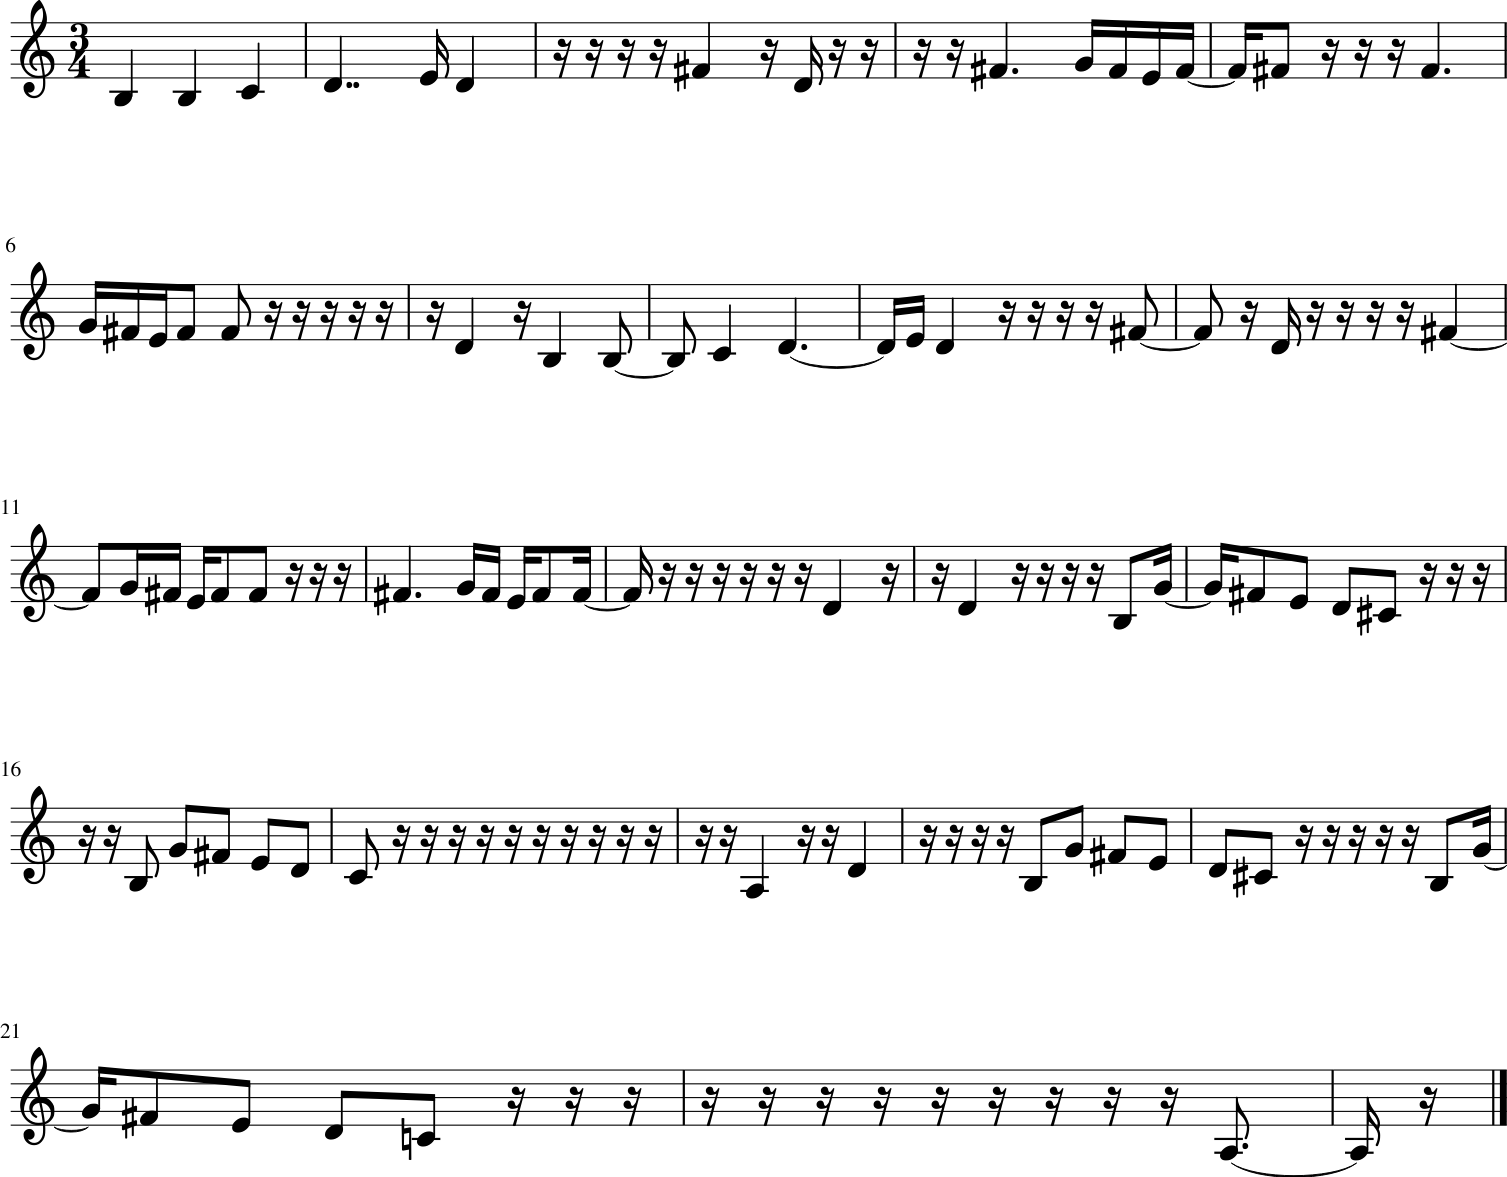

In [104]:
from music21 import *
sc = stream.Score()
ts = meter.TimeSignature('3/4')
sc.append(ts)
for t in melody_corpus:
    if t[0] == 0:
        r = note.Rest(quarterLength = 0.25)
        sc.append(r)
    else:
        n = note.Note(midi=t[0], quarterLength=t[1])
        sc.append(n)
sc.show()

In [105]:
filename='/home/eurismar/Downloads/midi/teste/teste.MID'
mf = midi.translate.streamToMidiFile(sc)
mf.open(filename, 'wb')
mf.write()
mf.close()